# Problem Statement

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

In [455]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [456]:
# Load dataset
df = pd.read_csv('Datasets/housing.csv')

# Print first few rows of dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# Understanding the Dataset

In [457]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


One column has type object

In [458]:
# Verify null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Only column *total_bedrooms* has null values

In [459]:
# Descriptive statistics of total_bedrooms column
df.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [460]:
# Mean value
df.total_bedrooms.mean()

537.8705525375618

In [461]:
# Median value
df.total_bedrooms.median()

435.0

In [462]:
# Mode value
df.total_bedrooms.mode()

0    280.0
Name: total_bedrooms, dtype: float64

# Handle missing values

In [463]:
# Handle missing values: Fill the missing values with the mean of the respective column.
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace = True) 

In [464]:
# Dataset without null values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [465]:
df.total_bedrooms.mean()

537.8705525375617

The difference between the first mean and new mean after clean null values in total_bedrooms column is very insignificant.

In [466]:
# Verify columns types 
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

Only *ocean_proximity* not is numeric

In [467]:
# Unique values in ocean_proximily
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Encode categorical data

In [468]:
# Convert categorical column in the dataset to numerical data.
df['ocean_proximity'] = df['ocean_proximity'].astype('category').cat.codes
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [469]:
# New unique values in ocean_proximily
df['ocean_proximity'].unique()

array([3, 0, 1, 4, 2], dtype=int8)

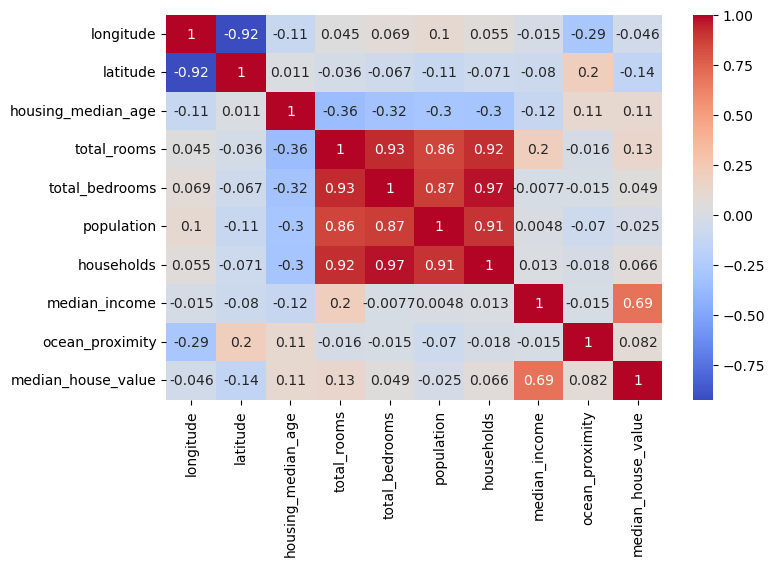

In [470]:
# Plot correlation
import seaborn as sns

plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

How we can observation, only *mean_income* has great corr with *media_house_value*, but in this project I'll used all columns,following the instructions of the author. In future project I'll make some adjust for improvement.

# Check Outliers values

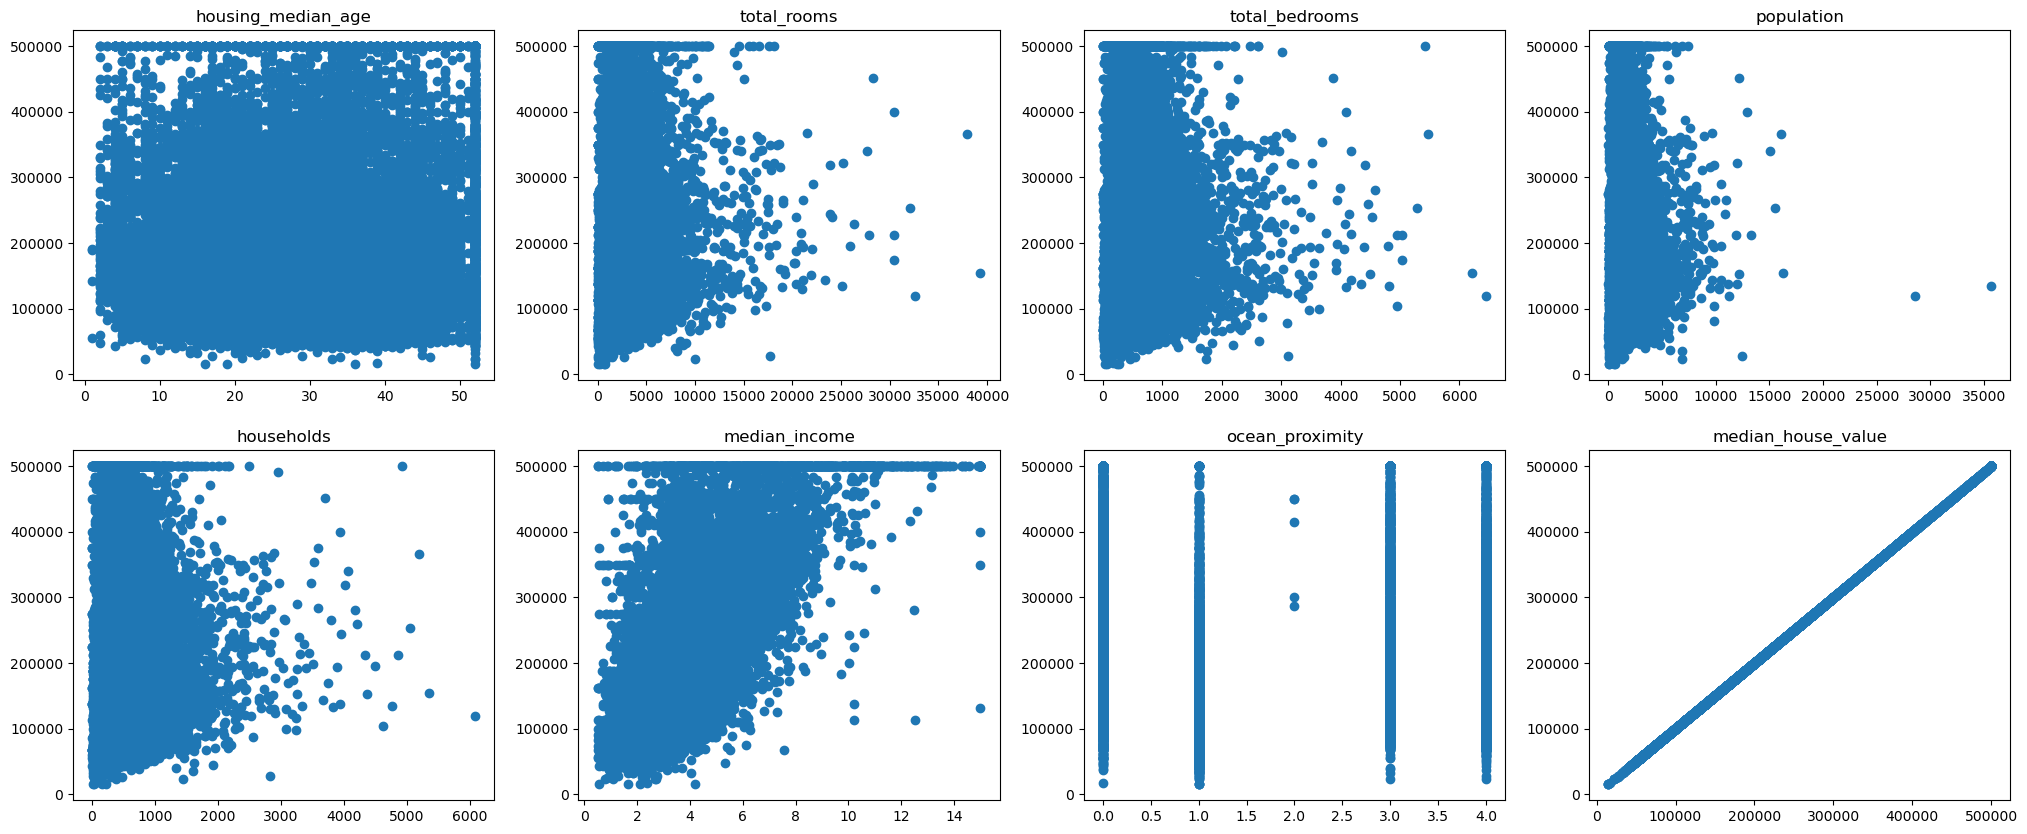

In [471]:
# See data distribuition for each columns
data = df.iloc[:,2:]   # Drop latitude and longitude

# Create a scatter plot for each column
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(25, 10))
axs = axs.flatten()
for i, col in enumerate(data.columns):
    axs[i].scatter(data[col], data['median_house_value'])
    axs[i].set_title(col);

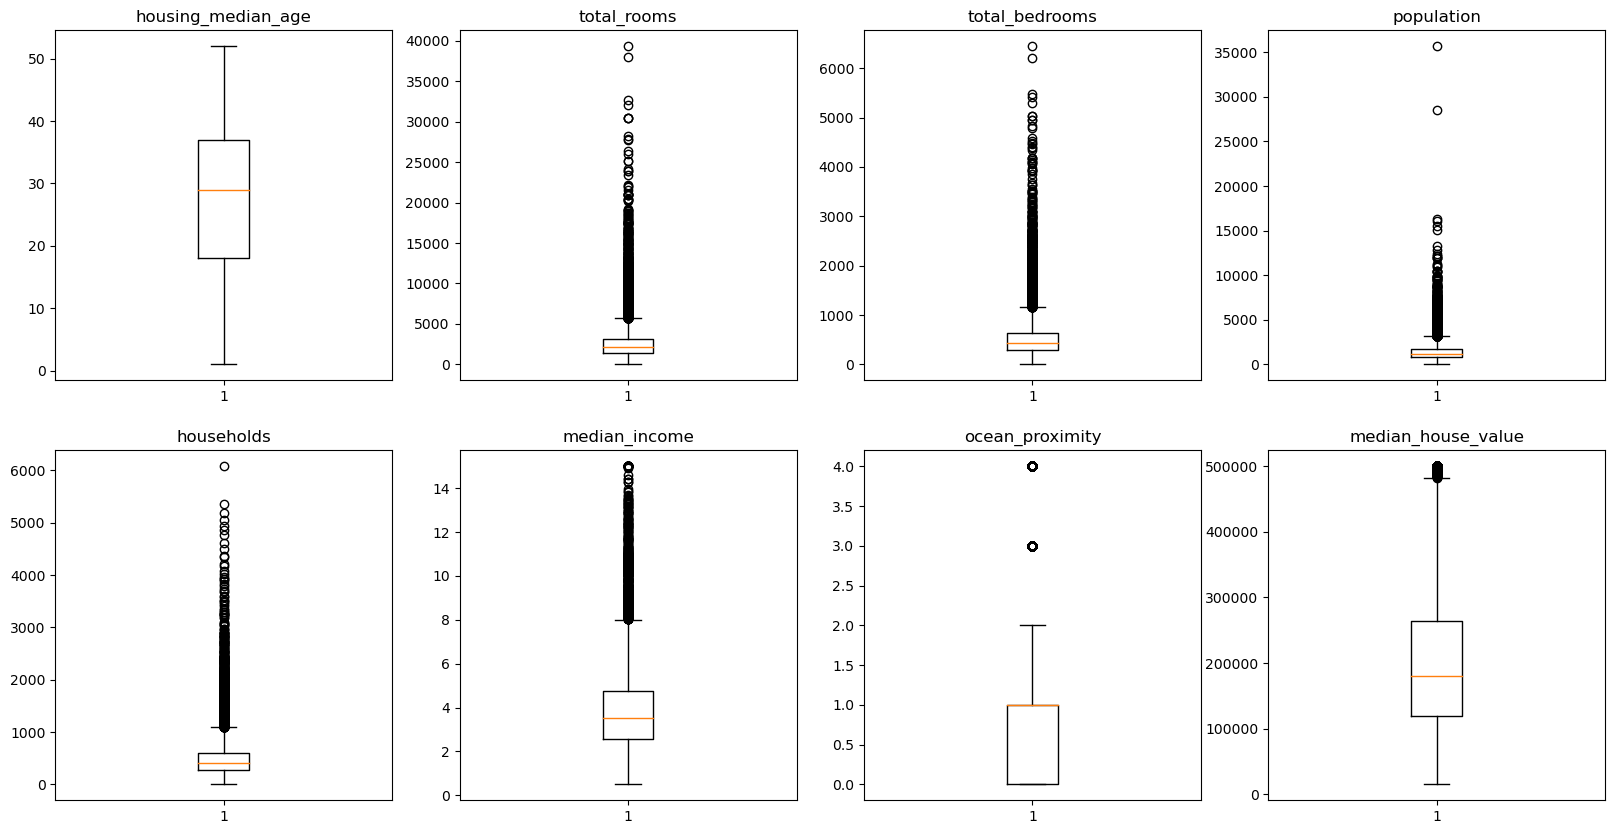

In [472]:
# Create a box plot for each feature
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()
for i, col in enumerate(data.columns):
    axs[i].boxplot(data[col])
    axs[i].set_title(col)

plt.show()

How can observation, dataset has some outliers values, this can be a future problem, but we going to see how the data behave.

# Split the dataset

In [473]:
# Split the data into 80% training dataset and 20% test dataset.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,:-1]                    # Select Features
y = df['median_house_value'].copy()   # Select independent variable

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 40 )

# Standardize data 

In [474]:
# Standardize training and test datasets.
# It's used to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


**Information:** The StandardScaler is sensitive to outliers, and the features may scale differently from each other in the presence of outliers, it means that the presence of outliers in the data can have a significant impact on the scaling of the features. Outliers are data points that are significantly different from other data points in the dataset.

# Perform Linear Regression

In [475]:
# Perform Linear Regression on training data. Predict output for test dataset using the fitted model. 
from sklearn.linear_model import LinearRegression

# Creat Instance
lr = LinearRegression()

# Fit method
lr.fit(X_train_std, y_train)


LinearRegression()

In [476]:
# Make prediction on new data.
y_pred_lr = lr.predict(X_test_std)

In [477]:
#Print root mean squared error (RMSE) an R² Score from Linear Regression 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Using functions
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
r2 = r2_score(y_test, y_pred_lr)

# Print error method 
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 51488.22
Root Mean Squared Error: 70266.22
R² Score: 0.64


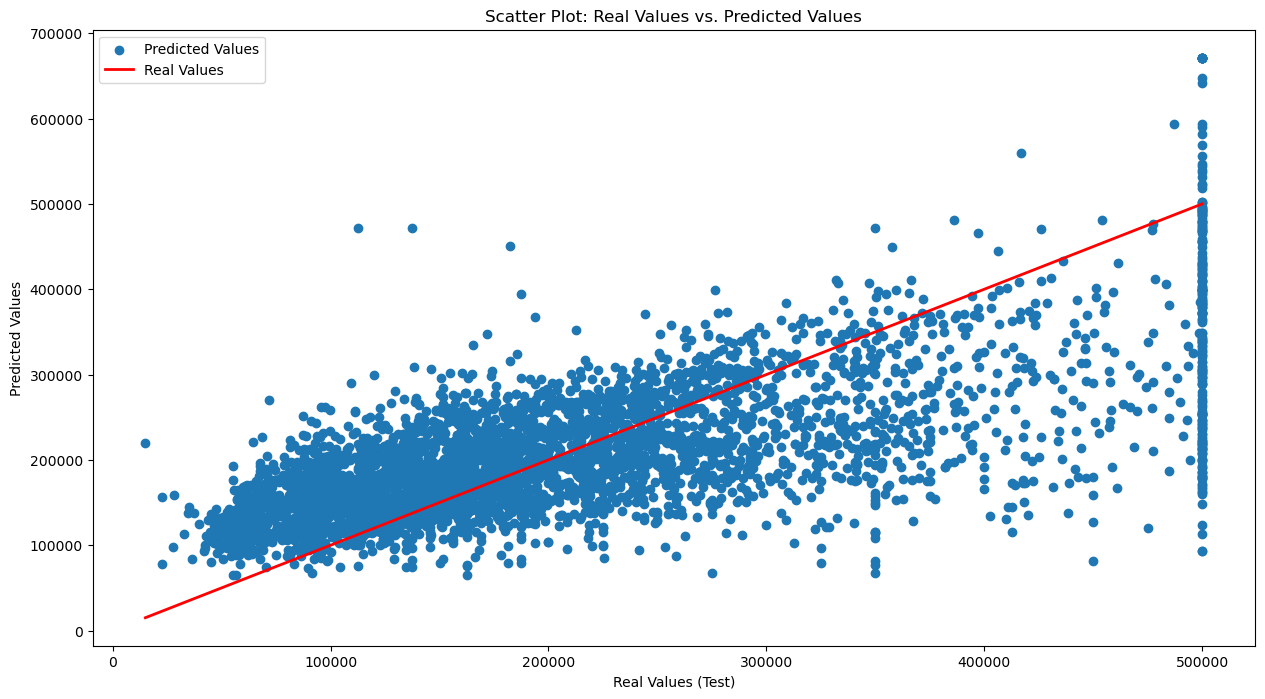

In [478]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Scatter plot for predicted values (in blue)
plt.scatter(y_test, y_pred, label='Predicted Values')

# Red line to connect real values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-',lw=2,  label='Real Values')

# Add labels, legend and title
plt.title('Scatter Plot: Real Values vs. Predicted Values')
plt.xlabel('Real Values (Test)')
plt.ylabel('Predicted Values')
plt.legend();


# Perform Decision Tree Regression 

In [479]:
# Perform Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Creat instance
dtr = DecisionTreeRegressor(random_state=1)

# Fit method
dtr.fit(X_train_std, y_train)


DecisionTreeRegressor(random_state=1)

In [480]:
# Make prediction on new data.
y_pred_dtr = dtr.predict(X_test_std)

In [481]:
# Print root mean squared error and R² Score from Decision Tree Regression.

# Using functions
mae = mean_absolute_error(y_test, y_pred_dtr)
rmse = mean_squared_error(y_test, y_pred_dtr, squared=False)
r2 = r2_score(y_test, y_pred_dtr)

# Print error method

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error: 44116.76
Root Mean Squared Error: 68921.14
R2 Score: 0.66


# Perform Random Forest Regression

In [482]:
# Perform Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# # Creat instance
rfr = RandomForestRegressor(random_state=0)

# Fit method
rfr.fit(X_train_std, y_train)


RandomForestRegressor(random_state=0)

In [483]:
# Make prediction on new data.
y_pred_rfr = rfr.predict(X_test_std)

In [484]:
# Print root mean squared error and R² Score from Random Forest Regression

mae = mean_absolute_error(y_test, y_pred_rfr)
rmse = mean_squared_error(y_test, y_pred_rfr, squared=False)
r2 = r2_score(y_test, y_pred_rfr)



print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R2: {r2:.4f}")


Mean Absolute Error: 32908.04
Root Mean Squared Error: 51040.5355
R2: 0.8113


# Bonus exercise: Perform Linear Regression with one independent variable

In [485]:
# Extracting median_income column from X_train and X_test
X_train_median_income = X_train['median_income'].values.reshape(-1, 1)
X_test_median_income = X_test['median_income'].values.reshape(-1, 1)

In [486]:
# Training a Linear Regression model to predict housing values based on median_income
regressor = LinearRegression()
regressor.fit(X_train_median_income, y_train)

LinearRegression()

In [487]:
# Predicting output for test dataset using the fitted model
y_pred = regressor.predict(X_test_median_income)

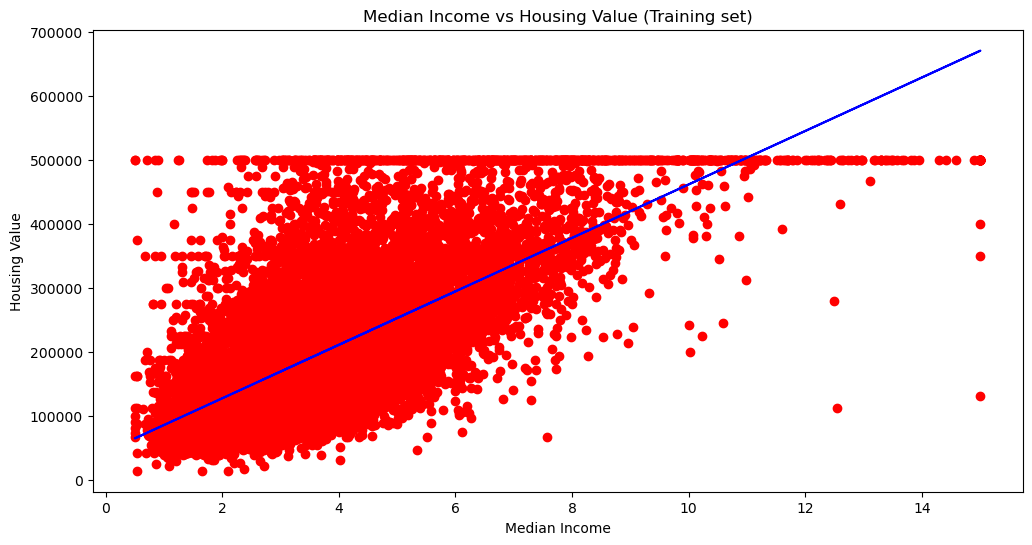

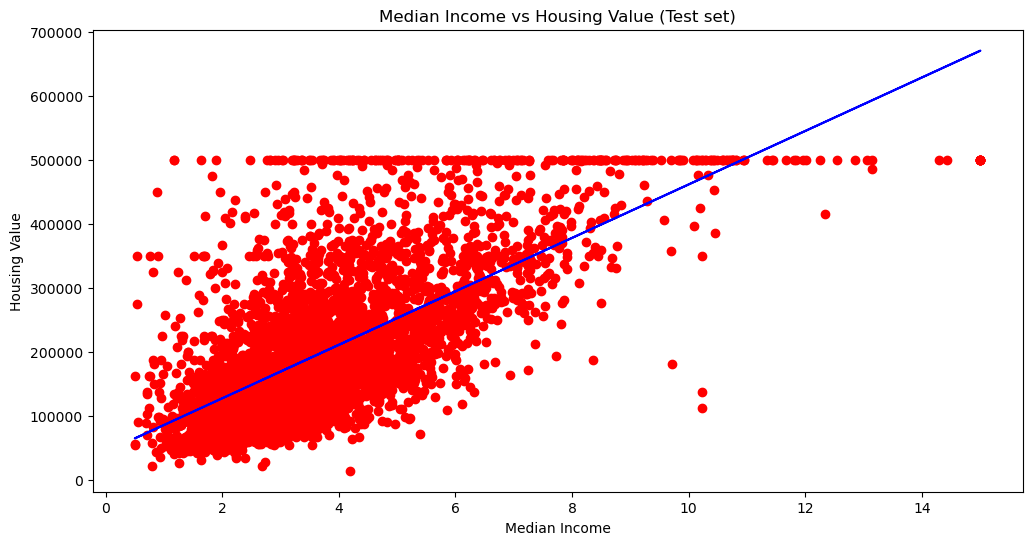

In [495]:
# Plotting the fitted model for training data as well as for test data to check if the fitted model satisfies the test data

plt.figure(figsize=(12,6))
plt.scatter(X_train_median_income, y_train, color='red')
plt.plot(X_train_median_income, regressor.predict(X_train_median_income), color='blue')
plt.title('Median Income vs Housing Value (Training set)')
plt.xlabel('Median Income')
plt.ylabel('Housing Value')
plt.show()


plt.figure(figsize=(12,6))
plt.scatter(X_test_median_income, y_test, color='red')
plt.plot(X_train_median_income, regressor.predict(X_train_median_income), color='blue')
plt.title('Median Income vs Housing Value (Test set)')
plt.xlabel('Median Income')
plt.ylabel('Housing Value')
plt.show()

# Conclusion

Based on these results, the Random Forest Regression model seems to be the best choice for the task. It has the lowest MAE and RMSE, indicating better predictive accuracy, and also has the highest R² score, which means it better explains the variance in the data. 

Even identifying possible problems with the dataset, such as outlier values, it is concluded that the Random Forest model surpasses the Linear Regression and Decision Tree Regression models for this specific problem.